In [1]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
company_name = ['MSFT', 'AAPL', 'GOOGL', 'AMZN']

In [3]:
# Establecemos la fecha a partir de la cual filtraremos los datos históricos
fecha_inicio_filtro = '2024-01-01'

all_data = {}

for company in company_name:
    print(f'Descargando datos de {company}')    

    # Construimos la URL para hacer la solicitud a la API de Alpha Vantage
    #La contraseña ha sido sustituida por asteriscos por motivos de privacidad
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={company}&outputsize=full&apikey=**********' 
    
    # Realizamos la solicitud HTTP a la API
    r = requests.get(url)

    # Convertimos la respuesta en formato JSON
    data = r.json()
    
    # Extraemos la sección de datos diarios de la serie temporal
    time_series_data = data['Time Series (Daily)']

    df = pd.DataFrame.from_dict(time_series_data, orient='index')
    
    # Convertimos el índice del DataFrame (fechas) al formato datetime de pandas
    df.index = pd.to_datetime(df.index)
    
    # Definimos una lista con los nombres de las columnas originales
    columns = ['1. open', '2. high', '3. low', '4. close', '5. volume']
    
    # Convertimos los valores de cada columna a tipo numérico
    for col in columns:
        df[col] = pd.to_numeric(df[col])

    # Creamos un diccionario para renombrar las columnas a nombres más simples
    columnas = {
        '1. open': 'open',
        '2. high': 'high',
        '3. low': 'low',
        '4. close': 'close',
        '5. volume': 'volume'
    }
    
    df = df.rename(columns=columnas)

    # Ordenamos el DataFrame por fecha (índice) en orden ascendente
    df.sort_index(inplace=True)

    # Filtramos el DataFrame para conservar solo las fechas iguales o posteriores a la fecha de inicio
    df_filtrado = df[df.index >= fecha_inicio_filtro]

    # Guardamos el DataFrame filtrado en el diccionario, usando el nombre de la empresa como clave
    all_data[company] = df_filtrado
    
    # Esperamos 12 segundos antes de continuar, para no exceder el límite de solicitudes de la API
    time.sleep(12)


Descargando datos de MSFT
Descargando datos de AAPL
Descargando datos de GOOGL
Descargando datos de AMZN


In [4]:
# Combinamos todos los DataFrames del diccionario en uno solo
df = pd.concat(all_data.values(), axis=1, keys=all_data.keys())

In [5]:
# Configuramos pandas para que muestre **todas** las columnas del DataFrame sin truncarlas
pd.set_option('display.max_columns', None)
df.head()

MSFT                                          AAPL            \
               open      high      low   close    volume     open      high   
2024-01-02  373.860  375.9000  366.771  370.87  25258633  187.150  188.4400   
2024-01-03  369.010  373.2562  368.510  370.60  23083465  184.220  185.8800   
2024-01-04  370.665  373.1000  367.170  367.94  20901502  182.150  183.0872   
2024-01-05  368.970  372.0600  366.500  367.75  20074451  181.990  182.7600   
2024-01-08  369.300  375.2000  369.010  374.69  23133967  182.085  185.6000   

                                         GOOGL                            \
                low   close    volume     open      high     low   close   
2024-01-02  183.885  185.64  82488674  138.550  139.4500  136.48  138.17   
2024-01-03  183.430  184.25  58414460  137.250  139.6300  137.08  138.92   
2024-01-04  180.880  181.91  71983570  138.420  139.1600  136.35  136.39   
2024-01-05  180.170  181.18  62196924  136.745  137.1558  135.15  135.73   
2024-01-08  181.500  185.56  59144470  136.290  139.0100  136.26  138.84   

                        AMZN                                    
              volume    open    high     low   close    volume  
2024-01-02  23711220  151.54  152.38  148.39  149.93  47339424  
2024-01-03  24212147  149.20  151.05  148.33  148.47  49425495  
2024-01-04  27137735  145.59  147.38  144.05  144.57  56039807  
2024-01-05  21661914  144.69  146.59  144.53  145.24  44770343  
2024-01-08  21403982  146.74  149.40  146.15  149.10  46757053

In [6]:
colors = {
    'MSFT':'green',
    'GOOGL':'blue',
    'AMZN':'orange',
    'AAPL':'gray'
}

company_name = {
    'MSFT':'MICROSOFT',
    'GOOGL': 'GOOGLE',
    'AMZN': 'AMAZON',
    'AAPL': 'APPLE'
}

## 1.1 Precio de Cierre

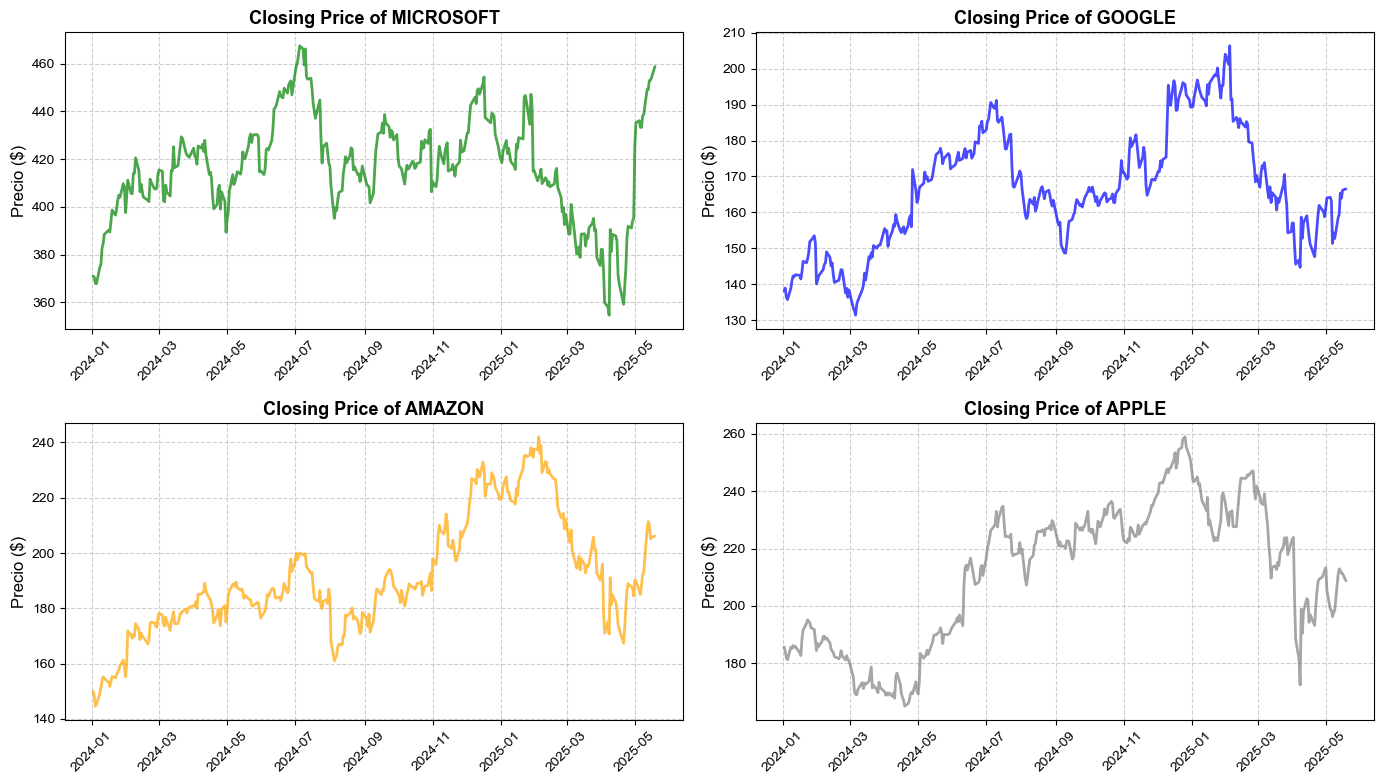

In [7]:
fig, axes = plt.subplots(2,2, figsize=(14,8))
axes = axes.flatten()

sns.set_theme(style="whitegrid")

for i, company in enumerate(company_name):
    sns.lineplot(ax = axes[i], data = df, x=df.index, y = df[(company, 'close')], color = colors[company], linewidth=2, alpha=0.7)
    axes[i].set_title(f'Closing Price of {company_name[company]}', fontsize=13, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Precio ($)', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, linestyle='--', alpha=0.6)



plt.tight_layout()
plt.show()

## 1.2 Volumen de Ventas

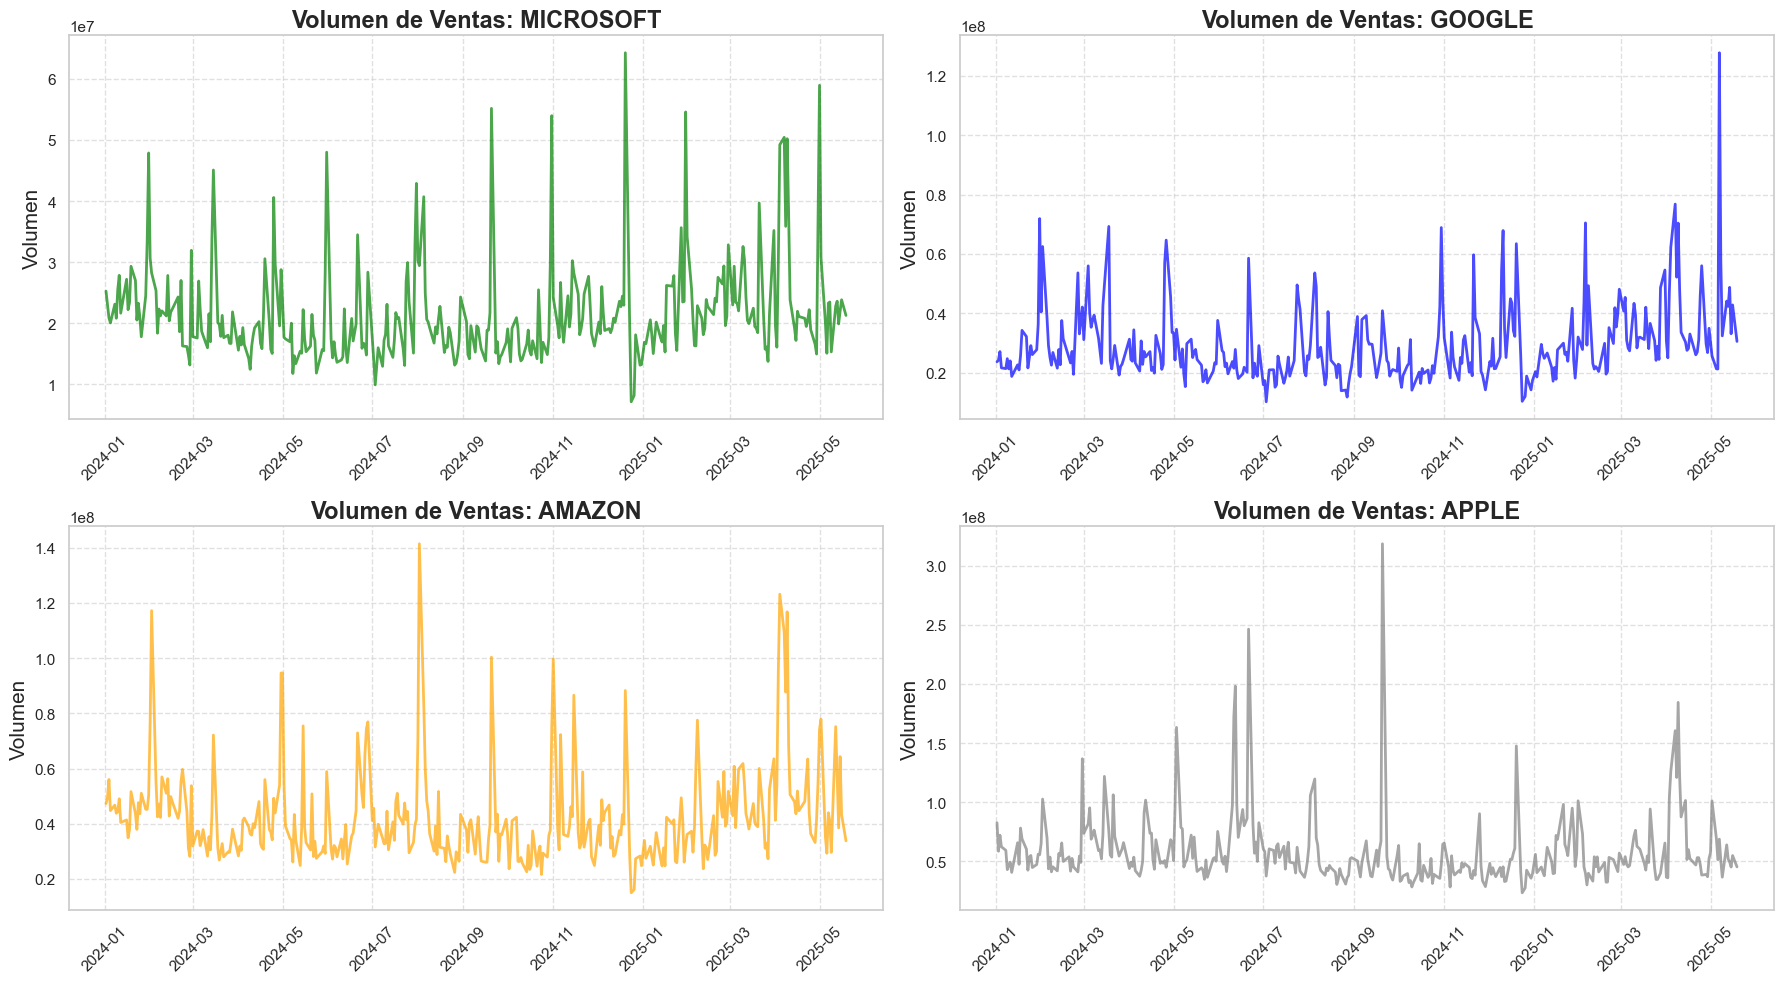

In [8]:
fig, axes = plt.subplots(2,2,figsize=(18,10))
axes = axes.flatten()

for i, company in enumerate(company_name):
    sns.lineplot(ax=axes[i], data=df, x=df.index, y=df[(company, 'volume')], color=colors[company], linewidth=2, alpha=0.7)
    axes[i].set_title(f'Volumen de Ventas: {company_name[company]}', fontsize=17, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Volumen', fontsize=15)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# 2. ¿Cuál fue la media móvil de las diversas acciones?

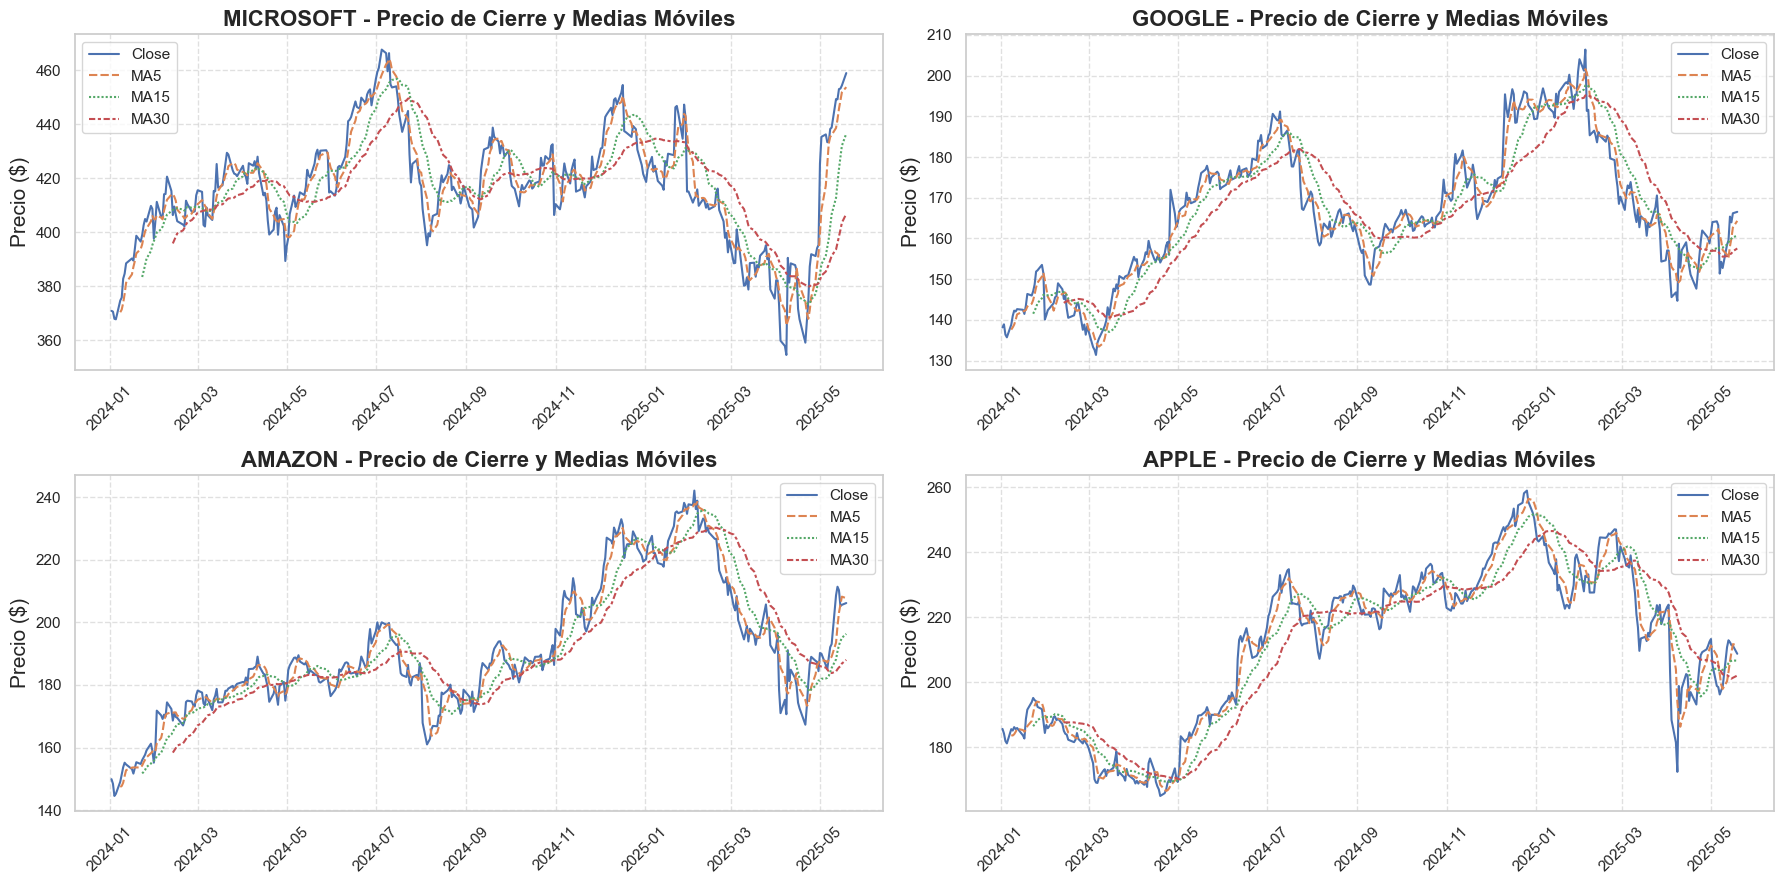

In [9]:
# Definimos los periodos para calcular medias móviles: 5, 15 y 30 días
ma_days = [5, 15, 30]

# Calculamos las medias móviles para cada empresa y las guardamos en nuevas columnas
for company in company_name:
    for ma in ma_days:
        column_name = f'MA{ma}'
        df[(column_name, company)] = df[(company, 'close')].rolling(window=ma).mean()

fig, axes = plt.subplots(2,2, figsize=(18,9))
axes = axes.flatten()

for i, company in enumerate(company_name):
    ax = axes[i]
    # Creamos un DataFrame temporal con las series necesarias para el gráfico
    temp_df = pd.DataFrame({
        'Close': df[(company, 'close')],
        'MA5': df[('MA5', company)],
        'MA15': df[('MA15', company)],
        'MA30': df[('MA30', company)]     
    })

    # Dibujamos las líneas de precio de cierre y medias móviles
    sns.lineplot(data=temp_df, ax=ax)
    ax.set_title(f'{company_name[company]} - Precio de Cierre y Medias Móviles', fontsize=16, fontweight='bold')
    ax.set_ylabel('Precio ($)', fontsize=15)
    ax.set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, linestyle='--', alpha=0.6)
    

plt.tight_layout()
plt.show()


# 3. ¿Cuál fue el rendimiento diario promedio de la acción?

In [10]:
df.head()

MSFT                                          AAPL            \
               open      high      low   close    volume     open      high   
2024-01-02  373.860  375.9000  366.771  370.87  25258633  187.150  188.4400   
2024-01-03  369.010  373.2562  368.510  370.60  23083465  184.220  185.8800   
2024-01-04  370.665  373.1000  367.170  367.94  20901502  182.150  183.0872   
2024-01-05  368.970  372.0600  366.500  367.75  20074451  181.990  182.7600   
2024-01-08  369.300  375.2000  369.010  374.69  23133967  182.085  185.6000   

                                         GOOGL                            \
                low   close    volume     open      high     low   close   
2024-01-02  183.885  185.64  82488674  138.550  139.4500  136.48  138.17   
2024-01-03  183.430  184.25  58414460  137.250  139.6300  137.08  138.92   
2024-01-04  180.880  181.91  71983570  138.420  139.1600  136.35  136.39   
2024-01-05  180.170  181.18  62196924  136.745  137.1558  135.15  135.73   
2024-01-08  181.500  185.56  59144470  136.290  139.0100  136.26  138.84   

                        AMZN                                       MA5 MA15  \
              volume    open    high     low   close    volume    MSFT MSFT   
2024-01-02  23711220  151.54  152.38  148.39  149.93  47339424     NaN  NaN   
2024-01-03  24212147  149.20  151.05  148.33  148.47  49425495     NaN  NaN   
2024-01-04  27137735  145.59  147.38  144.05  144.57  56039807     NaN  NaN   
2024-01-05  21661914  144.69  146.59  144.53  145.24  44770343     NaN  NaN   
2024-01-08  21403982  146.74  149.40  146.15  149.10  46757053  370.37  NaN   

           MA30     MA5  MA15  MA30      MA5 MA15 MA30      MA5 MA15 MA30  
           MSFT   GOOGL GOOGL GOOGL     AMZN AMZN AMZN     AAPL AAPL AAPL  
2024-01-02  NaN     NaN   NaN   NaN      NaN  NaN  NaN      NaN  NaN  NaN  
2024-01-03  NaN     NaN   NaN   NaN      NaN  NaN  NaN      NaN  NaN  NaN  
2024-01-04  NaN     NaN   NaN   NaN      NaN  NaN  NaN      NaN  NaN  NaN  
2024-01-05  NaN     NaN   NaN   NaN      NaN  NaN  NaN      NaN  NaN  NaN  
2024-01-08  NaN  137.61   NaN   NaN  147.462  NaN  NaN  183.708  NaN  NaN

In [11]:
daily_return = df.copy()

# Calculamos el retorno diario porcentual de cada empresa a partir de su precio de cierre
for company in company_name:
    daily_return[(company, 'daily return')] = df[(company, 'close')].pct_change()
# Extraemos únicamente las columnas correspondientes al retorno diario, eliminando el resto
daily_return = daily_return.xs('daily return', axis=1, level=1)
# Eliminamos la primera fila, que contiene un valor nulo por el cálculo de la variación porcentual
daily_return = daily_return.iloc[1:]

In [12]:
daily_return

,MSFT,GOOGL,AMZN,AAPL
2024-01-03,-0.000728,0.005428,-0.009738,-0.007488
2024-01-04,-0.007178,-0.018212,-0.026268,-0.012700
2024-01-05,-0.000516,-0.004839,0.004634,-0.004013
2024-01-08,0.018872,0.022913,0.026577,0.024175
2024-01-09,0.002936,0.015197,0.015225,-0.002263
...,...,...,...,...
2025-05-13,-0.000267,0.006752,0.013085,0.010152
2025-05-14,0.008461,0.036608,-0.005299,-0.002818
2025-05-15,0.000419,-0.008526,-0.024162,-0.004144
2025-05-16,0.002516,0.013601,0.002047,-0.000899


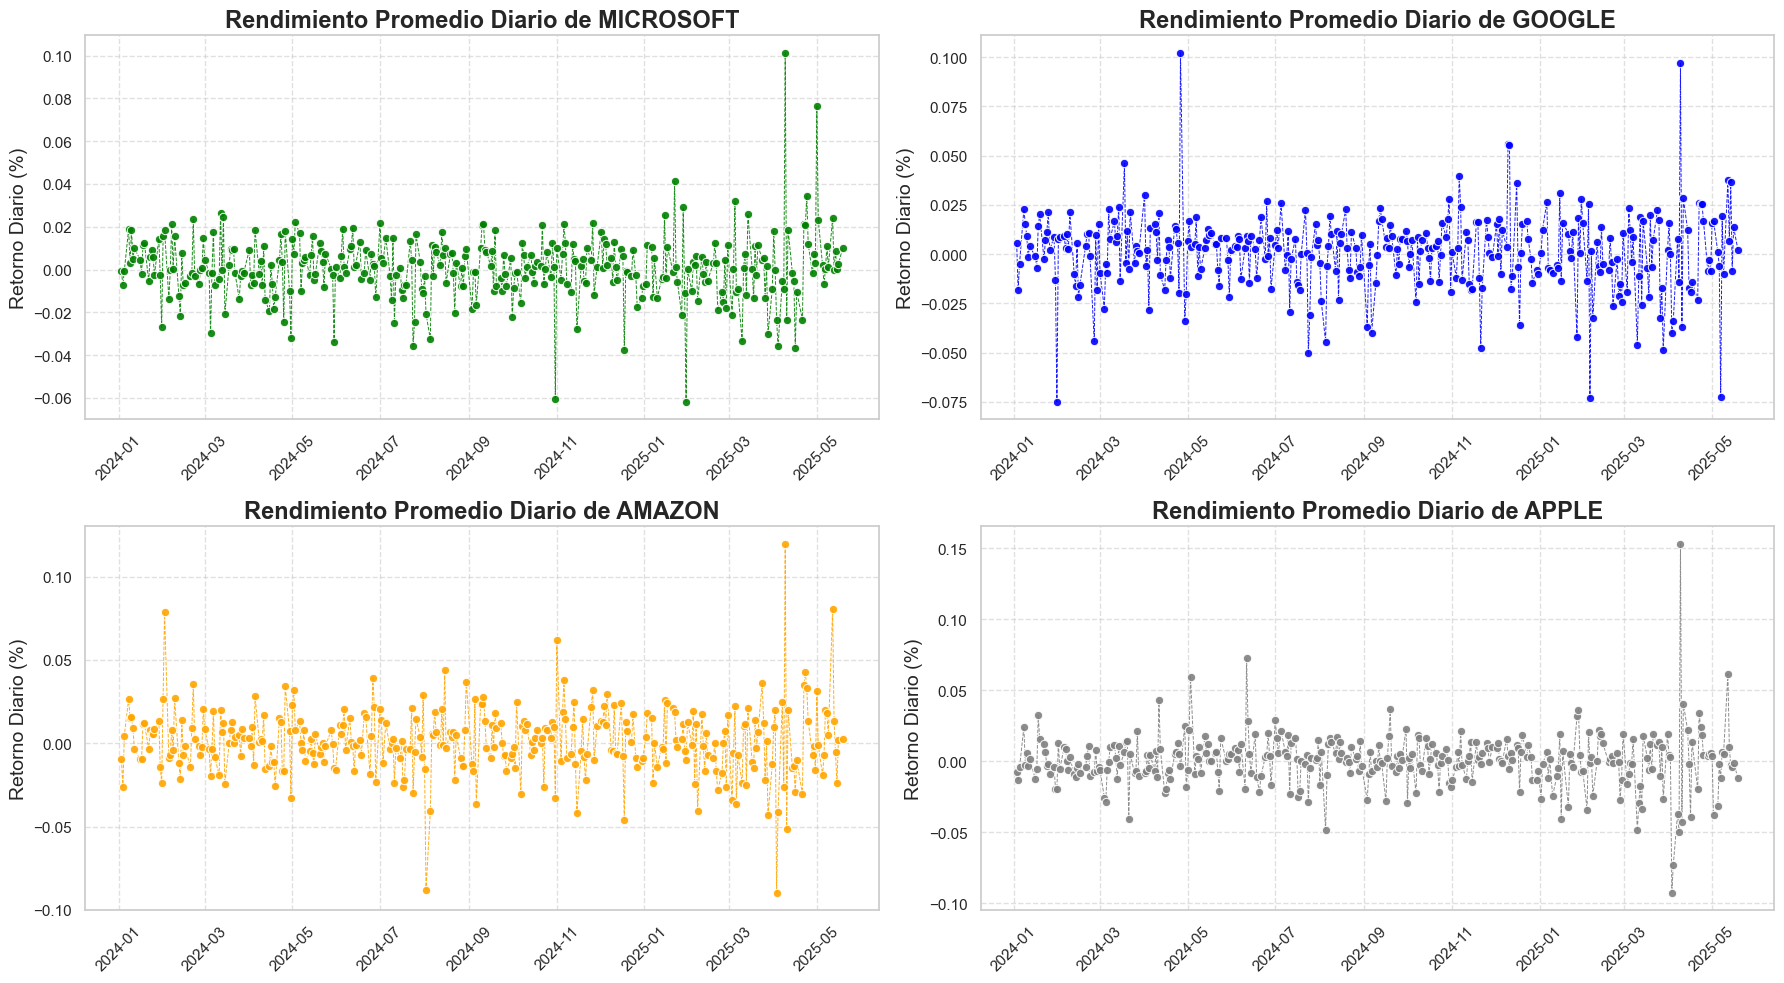

In [13]:
# Creamos una figura con 4 subgráficas (2x2) para visualizar el rendimiento diario de cada empresa
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()  # Aplanamos los ejes para recorrerlos fácilmente

for i, company in enumerate(company_name):
    sns.lineplot(
        ax=axes[i],
        data=daily_return,
        x=daily_return.index,
        y=daily_return[company],
        color=colors[company],
        marker='o',           # Añadimos marcadores para resaltar cada punto
        linestyle='--',       # Usamos una línea punteada
        linewidth=0.7,
        alpha=0.9
    )
    
    axes[i].set_title(f'Rendimiento Promedio Diario de {company_name[company]}', fontsize=17, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Retorno Diario (%)', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


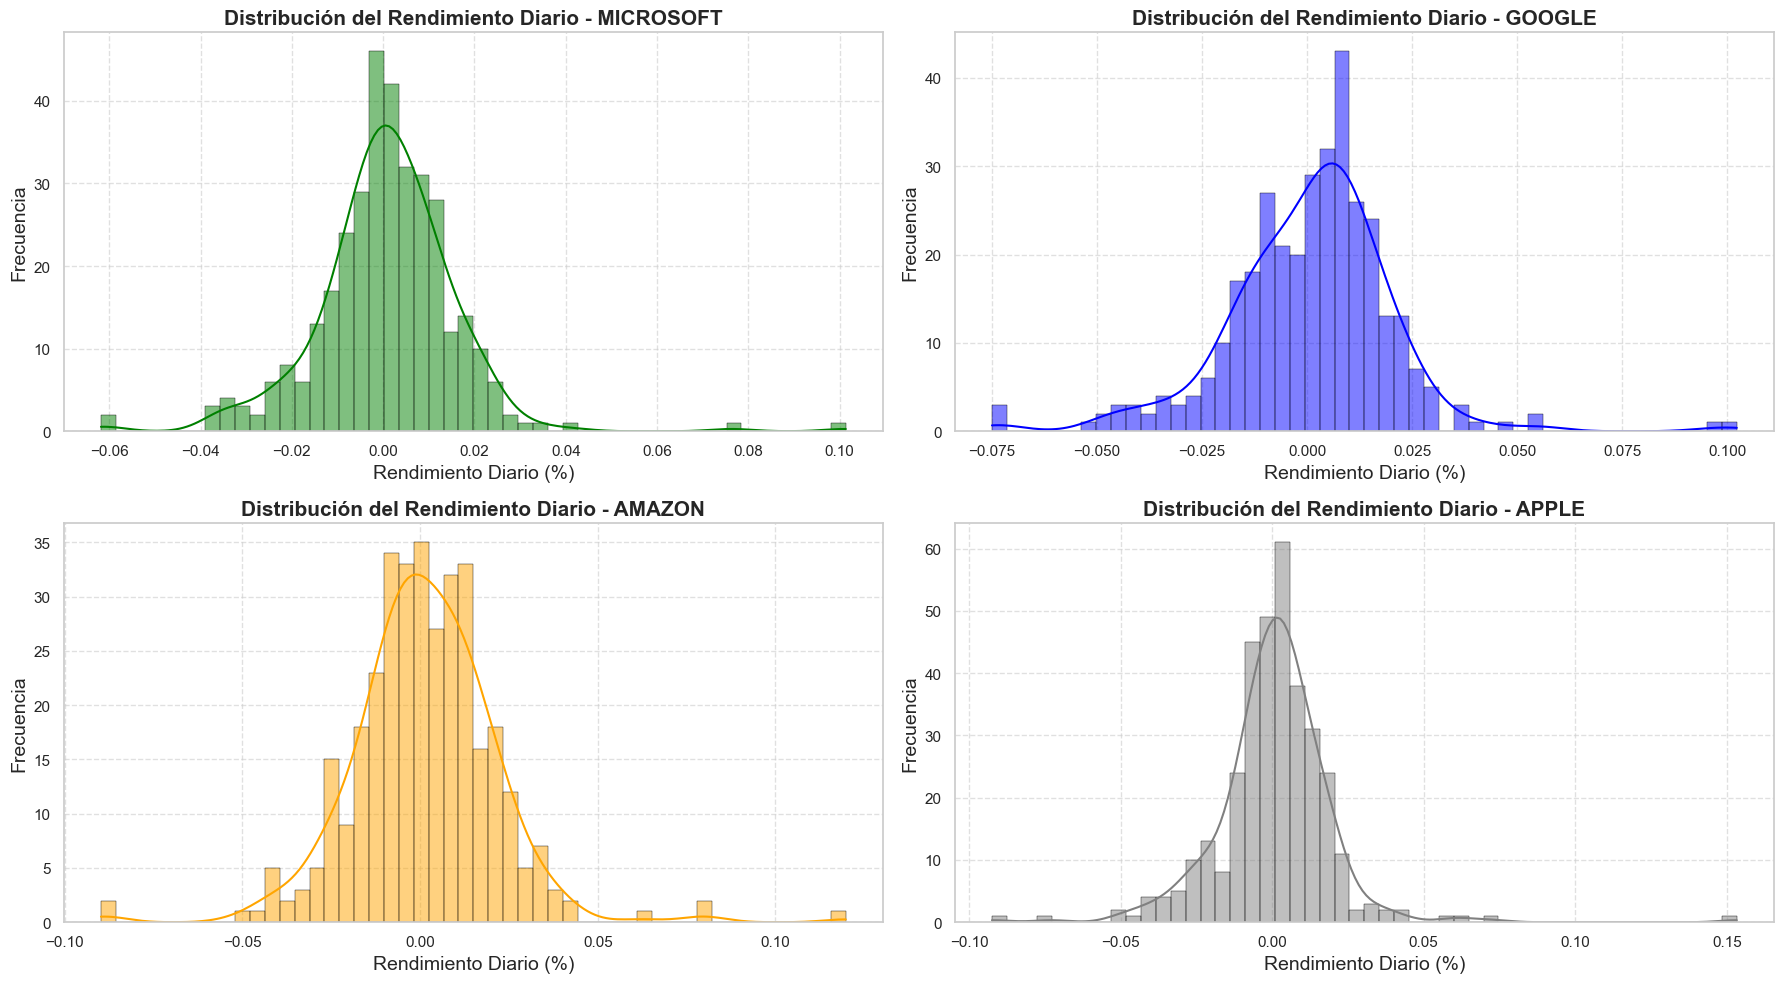

In [14]:
# Creamos una figura con 4 histogramas (uno por empresa) para visualizar la distribución de los retornos diarios
fig, axes = plt.subplots(2,2, figsize=(18,10))
axes = axes.flatten()

# Generamos un histograma para cada empresa con curva KDE para visualizar la densidad
for i, company in enumerate(company_name):
    sns.histplot(ax=axes[i], 
                 data=daily_return, 
                 x=daily_return[company], 
                 bins=50, 
                 kde = True, 
                 color = colors[company],
                 edgecolor='black', 
                 linewidth=0.3)
    
    axes[i].set_title(f'Distribución del Rendimiento Diario - {company_name[company]}', fontsize=15, fontweight='bold')
    axes[i].set_xlabel('Rendimiento Diario (%)', fontsize=14)
    axes[i].set_ylabel('Frecuencia', fontsize=14)
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()

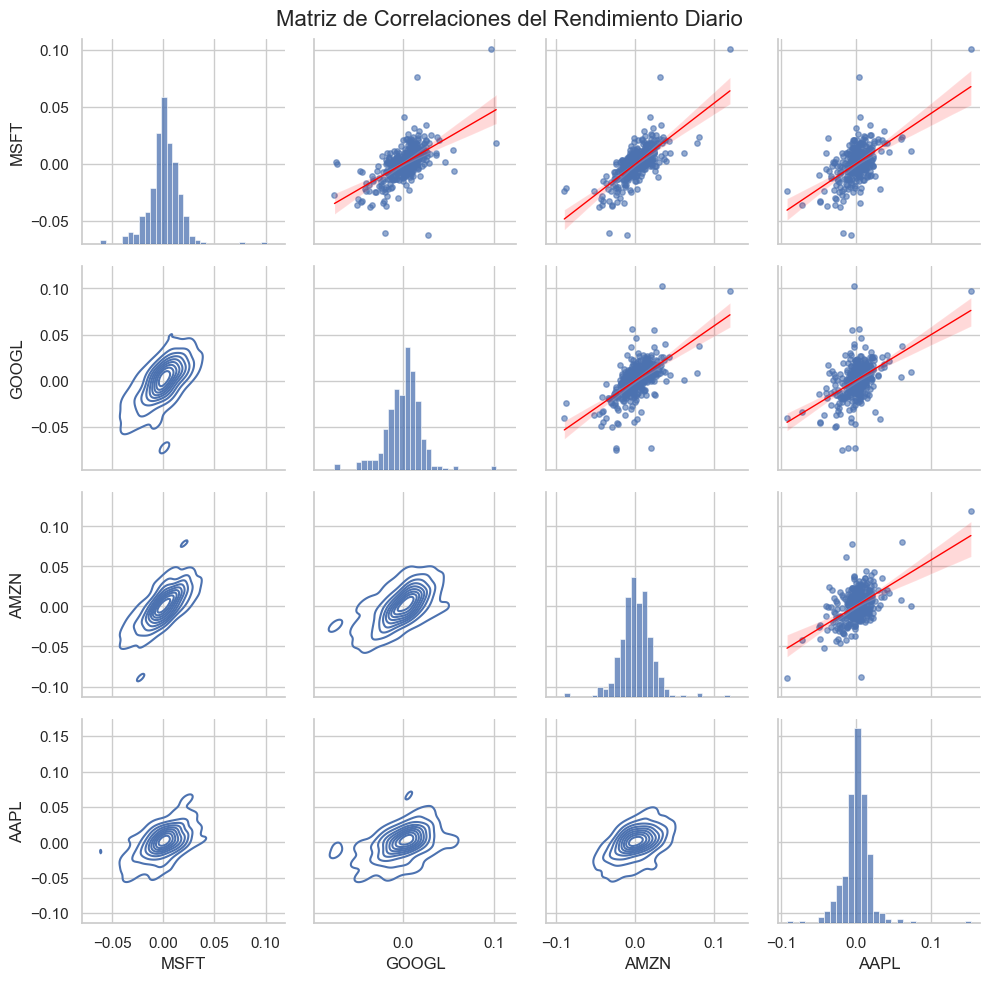

In [15]:
# Creamos una matriz de gráficos (PairGrid) para analizar las relaciones entre los retornos diarios de todas las empresas
g = sns.PairGrid(daily_return)

# En la parte superior de la matriz, mostramos gráficos de regresión lineal para observar la relación entre pares
g.map_upper(sns.regplot, scatter_kws={'s': 15, 'alpha': 0.6}, line_kws={'color': 'red', 'lw': 1})

# En la parte inferior, mostramos gráficos de densidad conjunta para visualizar la distribución bivariada
g.map_lower(sns.kdeplot)

# En la diagonal, mostramos histogramas para analizar la distribución individual de cada retorno diario
g.map_diag(sns.histplot, bins=30)

g.fig.suptitle("Matriz de Correlaciones del Rendimiento Diario", fontsize=16)
g.fig.subplots_adjust(top=0.95)

plt.show()


### Correlación de los rendimientos de las acciones mediante mapa de calor

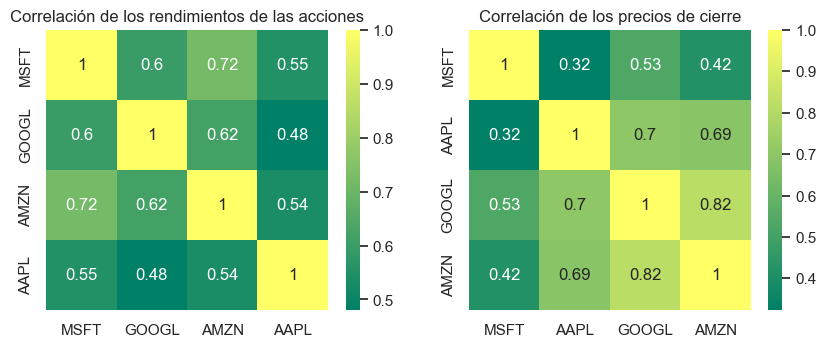

In [16]:
# Definimos el tamaño de la figura para alojar dos mapas de calor
plt.figure(figsize=(10, 8))

# Primer mapa de calor: mostramos la correlación entre los rendimientos diarios de las acciones
plt.subplot(2, 2, 1)
sns.heatmap(daily_return.corr(), annot=True, cmap='summer')  # Anotamos valores y usamos una paleta de colores cálidos
plt.title('Correlación de los rendimientos de las acciones')

# Segundo mapa de calor: mostramos la correlación entre los precios de cierre de las acciones
# Usamos .xs() para seleccionar solo las columnas de precios de cierre (segundo nivel 'close') de nuestro MultiIndex de columnas
plt.subplot(2, 2, 2)
sns.heatmap(df.xs('close', axis=1, level=1).corr(), annot=True, cmap='summer')
plt.title('Correlación de los precios de cierre')

# Mostramos ambos mapas juntos
plt.show()


### Relación entre rentabilidad esperada y riesgo

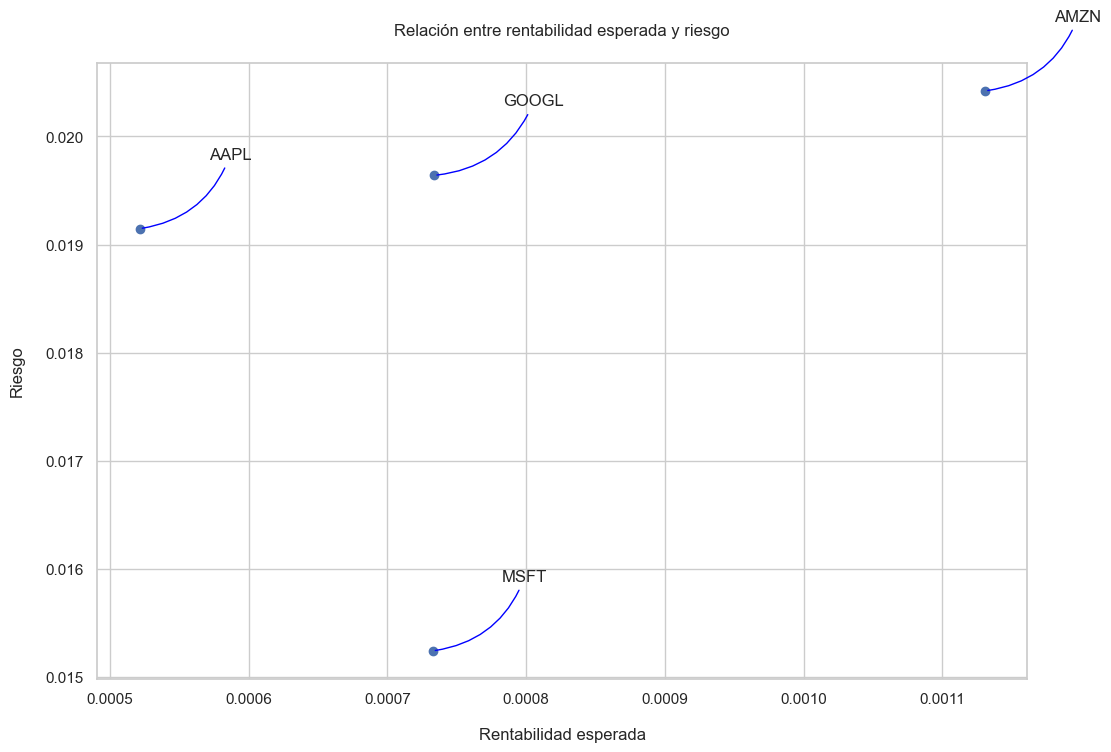

In [17]:
plt.figure(figsize=(12,8))

plt.scatter(daily_return.mean(), daily_return.std())
plt.title('Relación entre rentabilidad esperada y riesgo', pad=20)
plt.xlabel('Rentabilidad esperada', labelpad=15)
plt.ylabel('Riesgo', labelpad=15)

# Añadimos etiquetas a cada punto para identificar a qué empresa corresponde
for label, x, y in zip(daily_return.columns, daily_return.mean(), daily_return.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


plt.show()

## 4. ¿Cuál fue la acción más volátil durante el período analizado?

In [18]:
r = daily_return.std().idxmax()

print(f'La empresa con las acciones más volátiles durante el periodo analizado es {company_name[r]}')

La empresa con las acciones más volátiles durante el periodo analizado es AMAZON


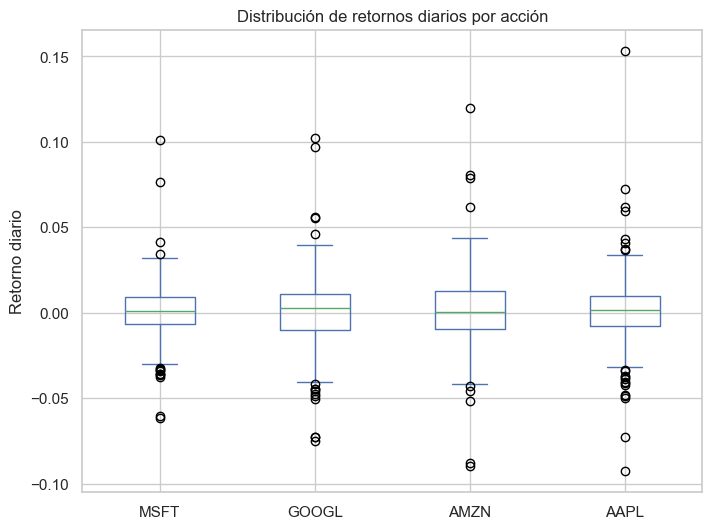

In [19]:
# Graficamos un diagrama de caja (boxplot) para visualizar la distribución de los retornos diarios de cada acción
daily_return.plot(kind='box', figsize=(8, 6))
plt.title("Distribución de retornos diarios por acción")
plt.ylabel("Retorno diario")
plt.grid(True)
plt.show()

## 5. ¿Cuál fue el rendimiento acumulado de cada acción?

In [20]:
# Calculamos el rendimiento acumulado a partir del rendimiento diario sumando 1 y aplicando el producto acumulativo
rendimiento_acumulado = (daily_return + 1).cumprod().reset_index()

# Renombramos la columna del índice a 'date' para que sea más claro
rendimiento_acumulado = rendimiento_acumulado.rename(columns={'index': 'date'})

# Transformamos el DataFrame de formato ancho a formato largo para facilitar el análisis y visualización
rendimiento_acumulado = rendimiento_acumulado.melt(id_vars=['date'])

rendimiento_acumulado


,date,variable,value
0,2024-01-03,MSFT,0.999272
1,2024-01-04,MSFT,0.992100
2,2024-01-05,MSFT,0.991587
3,2024-01-08,MSFT,1.010300
4,2024-01-09,MSFT,1.013266
...,...,...,...
1375,2025-05-13,AAPL,1.147005
1376,2025-05-14,AAPL,1.143773
1377,2025-05-15,AAPL,1.139033
1378,2025-05-16,AAPL,1.138009


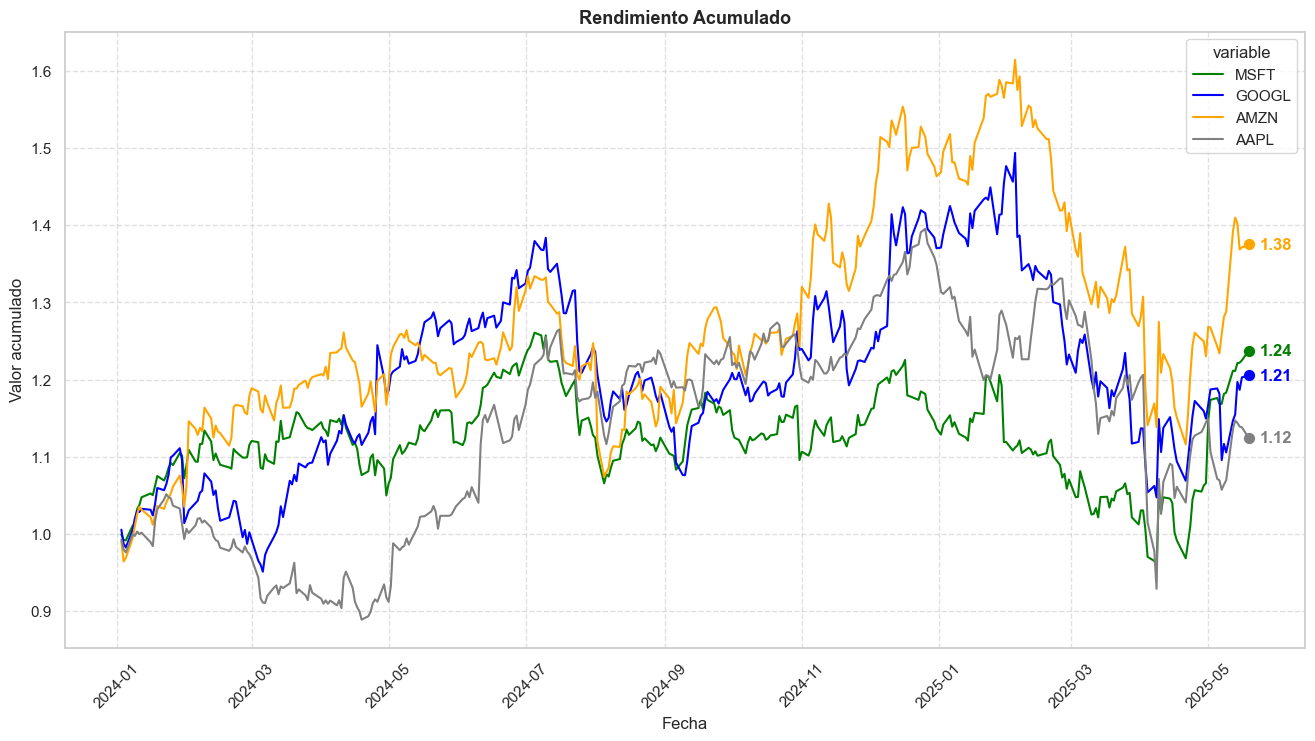

In [21]:
# Definimos el tamaño de la figura para la visualización
plt.figure(figsize=(16, 8))

# Creamos un gráfico de líneas con Seaborn para mostrar la evolución del rendimiento acumulado por acción a lo largo del tiempo
sns.lineplot(data=rendimiento_acumulado, x='date', y='value', hue='variable', palette=colors)

# Para cada empresa, identificamos el último valor del rendimiento acumulado y lo marcamos con un punto destacado
for company in company_name:
    datos_variable = rendimiento_acumulado[rendimiento_acumulado['variable'] == company]
    ultimo = datos_variable.sort_values('date').iloc[-1]
    
    # Añadimos un punto scatter en la última fecha con su respectivo color
    plt.scatter(ultimo['date'], ultimo['value'], color=colors[company], s=50)
    
    # Añadimos una etiqueta con el valor final del rendimiento acumulado ligeramente desplazada para no solaparse
    plt.text(ultimo['date'] + pd.Timedelta(days=5),
             ultimo['value'], 
             f"{ultimo['value']:.2f}", 
             color=colors[company], 
             fontsize=12, 
             weight='bold',
             va='center', 
             ha='left')

# Añadimos título, etiquetas de ejes, rotación de ticks en eje X y cuadrícula para facilitar la lectura
plt.title("Rendimiento Acumulado", fontsize=13, fontweight='bold')
plt.xlabel("Fecha")
plt.ylabel("Valor acumulado")
plt.tick_params(axis='x', rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Mostramos la gráfica
plt.show()


## 6. ¿Qué acción tuvo el mayor drawdown (máxima caída desde un pico)?

In [22]:
df_close = df.xs('close', level=1, axis=1)

In [23]:
max_drawdowns = {}

for col in df_close.columns:
    max_price_so_far = df_close[col].cummax()
    drawdown = (df_close[col] - max_price_so_far)/max_price_so_far
    max_drawdowns[col] = drawdown.min()

In [24]:
drawdown = pd.DataFrame(max_drawdowns.items(), columns=["Company", "Drawdown"])
drawdown.loc[drawdown['Drawdown'].idxmin()]

Company         AAPL
Drawdown   -0.334337
Name: 1, dtype: object